In [2]:
import pandas as pd
import os
import glob
  

path = os.getcwd()
files = glob.glob(os.path.join(path+"\ml-latest-small", "*.csv"))
files_lst = []
for f in files:

    df = pd.read_csv(f)
    files_lst.append(df)
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()

Location: S:\Fall2021\CSE482\ml-latest-small\links.csv
File Name: links.csv
Content:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0



Location: S:\Fall2021\CSE482\ml-latest-small\movies.csv
File Name: movies.csv
Content:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation



Location: S:\Fall2021\CSE482\ml-latest-small\ratings.csv
File Name: ratings.csv
Content:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352



Location: S:\Fall2021\CSE482\ml-latest-small\tags.csv
File Name: tags.csv
Content:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [45]:
temp = files_lst[0]

for i in range(1,len(files_lst)):
    temp = pd.merge(left = temp, right = files_lst[i], how = 'left')
temp = temp.sort_values(by=['userId'])
#pd.set_option('display.max_rows', 1000000)
temp.head()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp,tag
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,964982703.0,NaN
35549,1777,120888,11003.0,"Wedding Singer, The (1998)",Comedy|Romance,1.0,4.0,964981230.0,NaN
35250,1732,118715,115.0,"Big Lebowski, The (1998)",Comedy|Crime,1.0,5.0,964981125.0,NaN
34349,1676,120201,563.0,Starship Troopers (1997),Action|Sci-Fi,1.0,3.0,964982620.0,NaN
2379,50,114814,629.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1.0,5.0,964982931.0,NaN


In [47]:
# trimp up the "don't like movie rating"
import numpy as np
temp_2 = temp.groupby(['userId']).agg({'rating':[np.mean]})
print(temp_2)

          rating
            mean
userId          
1.0     4.366379
2.0     3.948276
3.0     2.435897
4.0     3.555556
5.0     3.636364
...          ...
606.0   3.657399
607.0   3.786096
608.0   3.134176
609.0   3.270270
610.0   3.688556

[610 rows x 1 columns]


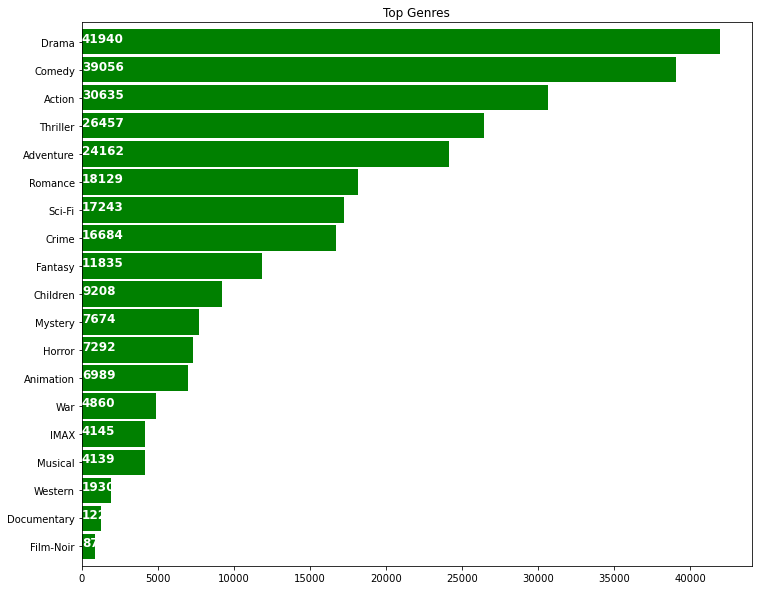

{'Children', 'Romance', 'Documentary', 'Comedy', 'Animation', 'Mystery', '(no genres listed)', 'IMAX', 'Horror', 'Crime', 'Film-Noir', 'War', 'Drama', 'Western', 'Fantasy', 'Action', 'Adventure', 'Sci-Fi', 'Musical', 'Thriller'}


In [48]:
%matplotlib inline  
from matplotlib import pyplot as plt 
plt.subplots(figsize=(12,10))
list1 = []
set_1 = set()
gen_lst = []
for i in temp['genres']:
    i_lst = i.split('|')
    temp_set = set(i_lst)
    set_1 = set_1.union(temp_set)
    list1.extend(i_lst)
    gen_lst.append(i_lst)
l = len(set_1) -1
ax = pd.Series(list1).value_counts()[:l].sort_values(ascending=True).plot.barh(width=0.9,color='green')
for i, v in enumerate(pd.Series(list1).value_counts()[:l].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()
print(set_1)
#print(gen_lst)

In [49]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
#creating labelEncoder
#le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
#gen_encoded=le.fit_transform(list(set_1))
#print(gen_encoded)



[ 4 15  7  5  3 14  0 12 11  6 10 18  8 19  9  1  2 16 13 17]


In [55]:
gen_numeric = []
print(len(gen_lst))
for i in range(len(gen_lst)):
    l = le.transform(gen_lst[i])
    gen_numeric.append(l)
    #print(l)

100854


In [60]:
#source : https://www.kaggle.com/heeraldedhia/movie-ratings-and-recommendation-using-knn
def binary(genre_list):
    binaryList = []
    
    for genre in genre_list:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList



name_l = ['Children', 'Romance', 'Documentary', 'Comedy', 
                            'Animation', 'Mystery', '(no genres listed)', 
                            'IMAX', 'Horror', 'Crime', 'Film-Noir', 'War', 
                            'Drama', 'Western', 'Fantasy', 'Action', 'Adventure', 
                            'Sci-Fi', 'Musical', 'Thriller']

#gen_pd =  pd.DataFrame(gen_lst)
#print(gen_pd.head())
#gen_pd = gen_pd.apply(lambda x: binary(name_l))
#print(gen_pd.head())
#all_gen = pd.DataFrame(columns=name_l)


    
    


           0          1         2       3        4     5     6     7     8  \
0  Adventure  Animation  Children  Comedy  Fantasy  None  None  None  None   
1     Comedy    Romance      None    None     None  None  None  None  None   
2     Comedy      Crime      None    None     None  None  None  None  None   
3     Action     Sci-Fi      None    None     None  None  None  None  None   
4      Crime    Mystery  Thriller    None     None  None  None  None  None   

      9  
0  None  
1  None  
2  None  
3  None  
4  None  
   0  1  2  3  4  5  6  7  8  9
0  1  1  1  1  1  1  1  1  1  1
1  1  1  1  1  1  1  1  1  1  1
2  1  1  1  1  1  1  1  1  1  1
3  1  1  1  1  1  1  1  1  1  1
4  1  1  1  1  1  1  1  1  1  1


In [59]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(temp['userId'], gen_numeric)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.  1.  1. ... nan nan nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.